In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
train_ds = pd.read_csv('/content/drive/My Drive/credit/trainDS.csv')
test_ds = pd.read_csv('/content/drive/My Drive/credit/testDS.csv')

Lets look at our data:

In [4]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73276 entries, 0 to 73275
Data columns (total 11 columns):
feature1    73276 non-null float64
age         73276 non-null int64
feature2    73276 non-null int64
feature3    73276 non-null float64
feature4    73276 non-null object
feature5    73276 non-null int64
feature6    73276 non-null int64
feature7    73276 non-null int64
feature8    73276 non-null int64
feature9    73276 non-null object
target      73276 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 6.1+ MB


In [5]:
test_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31405 entries, 0 to 31404
Data columns (total 10 columns):
feature1    31405 non-null float64
age         31405 non-null int64
feature2    31405 non-null int64
feature3    31405 non-null float64
feature4    31405 non-null object
feature5    31405 non-null int64
feature6    31405 non-null int64
feature7    31405 non-null int64
feature8    31405 non-null int64
feature9    31405 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 2.4+ MB


In [6]:
train_ds.head()

,feature1,age,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,target
0,0.001963,42,0,0.079941,1350,7,0,0,0,0,0
1,0.004538,86,0,3.000000,,2,0,0,0,,0
2,0.023044,61,0,0.419916,5000,18,0,2,0,1,0
3,0.121242,48,0,0.526589,2500,12,0,1,0,1,0
4,1.000000,49,3,0.256567,5900,3,3,1,1,2,1


In [7]:
train_ds['target'].value_counts()

0    68382
1     4894
Name: target, dtype: int64

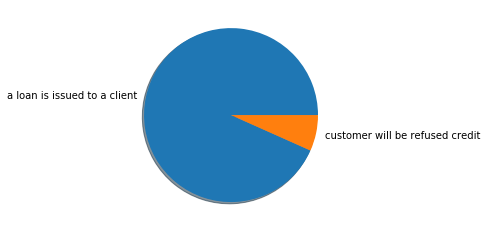

In [8]:
x = train_ds['target'].value_counts()
plt.pie(x, labels = ['a loan is issued to a client', 'customer will be refused credit'], shadow=True)
plt.show()

So, as we can see we deal with **unbalanced** dataset, so the metric for estimation of our models will be **f1** and also we can explore **recall**, as it would be good idea to detect 'risk' customers

Lets explore features

#feature1

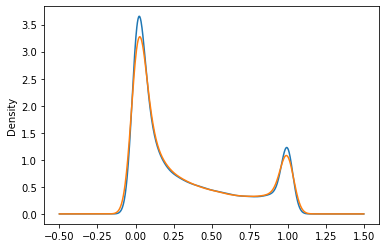

In [0]:
train_ds.feature1.plot.density()
test_ds.feature1.plot.density()
plt.show()

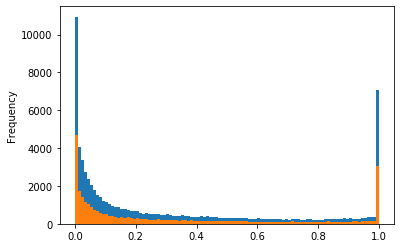

In [0]:
train_ds.feature1.plot.hist(bins = 100)
test_ds.feature1.plot.hist(bins = 100)
plt.show()

looks not really good on the borders

#age

In [0]:
train_ds.age.nunique()

59

In [0]:
test_ds.age.nunique()

59

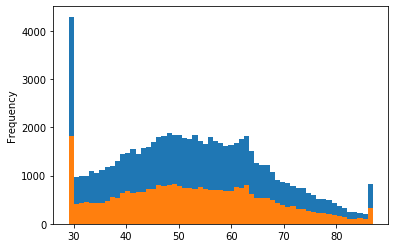

In [0]:
train_ds.age.plot.hist(bins = 59)
test_ds.age.plot.hist(bins = 59)
plt.show()

Hm, pretty same situation with borders

It would be possible to use the rule of **3 sigm**, but as it's the age and the data lie within adequate limits, we won't do that

#feature2

Unique values of feature 2 in train and test dataset:

In [0]:
print(train_ds.feature2.unique())
print()
print(test_ds.feature2.unique())

[0 3 1 2 4]

[0 2 1 3 4]


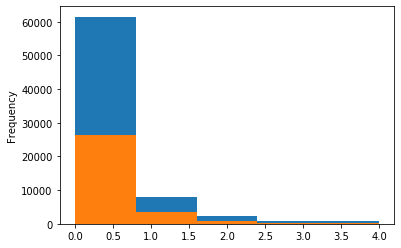

In [0]:
train_ds.feature2.plot.hist(bins = 5)
test_ds.feature2.plot.hist(bins = 5)
plt.show()

This one looks much better

#feature3

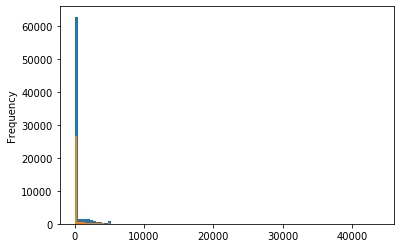

In [0]:
train_ds.feature3.plot.hist(bins = 100)
test_ds.feature3.plot.hist(bins = 100)
plt.show()

In [0]:
print('Train: %2d \n' % train_ds.feature3.nunique())
print('Test: %2d ' %test_ds.feature3.nunique())

Train: 57159 

Test: 26058 


In [0]:
train_ds.feature3.value_counts().head()

0.004329       3712
4981.000000     723
1.000000        102
4.000000         86
2.000000         82
Name: feature3, dtype: int64

In [0]:
test_ds.feature3.value_counts().head()

0.004329       1552
4981.000000     319
1.000000         56
2.000000         41
4.000000         36
Name: feature3, dtype: int64

Very big values with very small, maybe we will apply rank to this feature

#feature4

Number of unique values of feature 4 in train and test dataset:

In [0]:
print('Train: %2d \n' % train_ds.feature4.nunique())
print('Test: %2d ' %test_ds.feature4.nunique())

Train: 9729 

Test: 6410 


In [0]:
train_ds.feature4.value_counts().head()

        14462
1300     3024
5000     1345
4000     1045
6000      992
Name: feature4, dtype: int64

In [0]:
test_ds.feature4.value_counts().head()

        6229
1300    1329
5000     550
4000     445
6000     402
Name: feature4, dtype: int64

We can see that missed values were hidden behind spaces

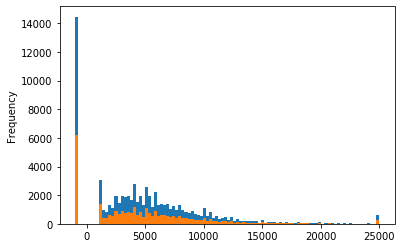

In [0]:
train_ds.feature4.replace(' ', -999).astype(float).plot.hist(bins = 100)
test_ds.feature4.replace(' ', -999).astype(float).plot.hist(bins = 100)
plt.show()

#feature5

Unique values of feature 5 in train and test dataset:

In [0]:
print(train_ds.feature5.unique())
print()
print(test_ds.feature5.unique())

[ 7  2 18 12  3  8  4  9  5 10  6 16 11 14 21 13 24 20 15 17 23 22 19]

[ 9 10  5 12  2 16  7  4  3 11  6 19  8 15 13 23 24 14 21 20 17 18 22]


In [0]:
train_ds.feature5.nunique()

23

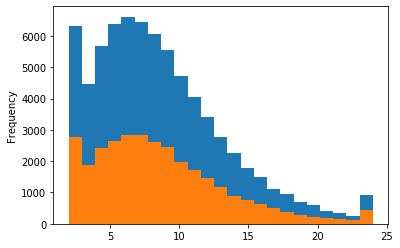

In [0]:
train_ds.feature5.plot.hist(bins = 23)
test_ds.feature5.plot.hist(bins = 23)
plt.show()

It's reminiscent of something we've seen before

#feature6

Unique values of feature 6 in train and test dataset:

In [0]:
print(train_ds.feature6.unique())
print()
print(test_ds.feature6.unique())

[0 3 1 2]

[0 1 2 3]


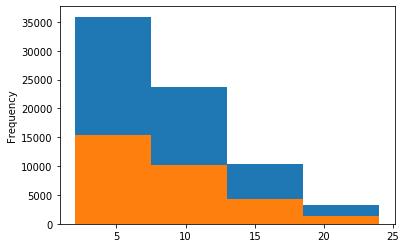

In [0]:
train_ds.feature5.plot.hist(bins = 4)
test_ds.feature5.plot.hist(bins = 4)
plt.show()

#feature7

Unique values of feature 7 in train and test dataset:

In [0]:
print(train_ds.feature7.unique())
print()
print(test_ds.feature7.unique())

[0 2 1 3 4]

[1 0 2 3 4]


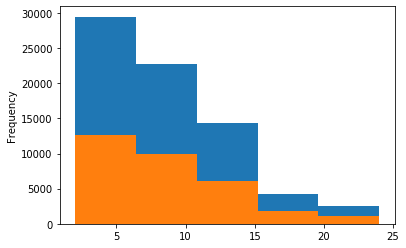

In [0]:
train_ds.feature5.plot.hist(bins = 5)
test_ds.feature5.plot.hist(bins = 5)
plt.show()

#feature8

Unique values of...

In [0]:
print(train_ds.feature8.unique())
print()
print(test_ds.feature8.unique())

[0 1 2]

[0 1 2]


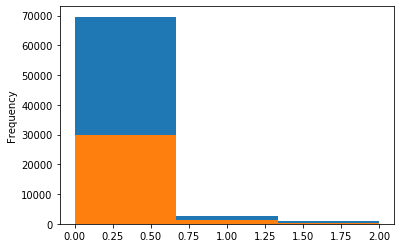

In [0]:
train_ds.feature8.plot.hist(bins = 3)
test_ds.feature8.plot.hist(bins = 3)
plt.show()

#feature9

In [0]:
print(train_ds.feature9.unique())
print()
print(test_ds.feature9.unique())

['0' ' ' '1' '2' '3' '4']

['0' '3' '2' '1' '4' ' ']


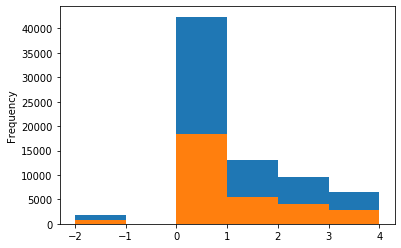

In [0]:
train_ds.feature9.replace(' ', -2).astype(int).plot.hist(bins = 6)
test_ds.feature9.replace(' ', -2).astype(int).plot.hist(bins = 6)
plt.show()

So, we can make some **conlusion**: in all cases **distributions** of test and train values are the same

#Correlation plot

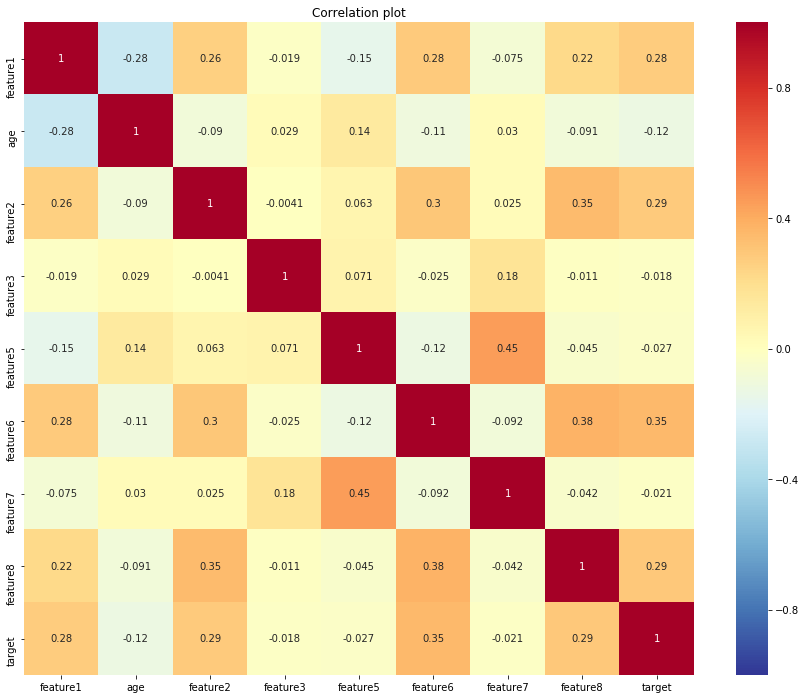

In [0]:
plt.figure(figsize = (15, 12))

# Heatmap of correlations
sns.heatmap(train_ds.corr(), cmap = plt.cm.RdYlBu_r, vmin = -1.0, annot = True, vmax = 1.0)
plt.title('Correlation plot');

#Base line

As most of features are categorical, we will use **tree-based** estimators

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate


In [0]:
randf = RandomForestClassifier(random_state=0, n_jobs=-1, max_depth = 15, n_estimators=200) #max_f = 3, default

Firstly, we will try to train classifier with almost non-prepared data

In [0]:
X = train_ds.drop(columns='target')
y = train_ds['target']

In [0]:
X.feature4 = X.feature4.replace(' ', -999).astype(int)
X.feature9 = X.feature9.replace(' ', -1).astype(int)

As specified in the documentation, **cross_validate** use **StratifienKFold**, so to estimate Random Forest, we will use it:

In [0]:
res = cross_validate(randf, X, y, scoring=['f1', 'recall'], n_jobs=-1, cv=5, return_train_score=True, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


In [0]:
print('Test F1: % 0.4f \nTrain F1: % 0.4f \nTest Recall:% 0.4f \nTrain Recall: % 0.4f ' % (np.mean(res['test_f1']), 
                                                                                          np.mean(res['train_f1']),
                                                                                          np.mean(res['test_recall']),
                                                                                          np.mean(res['train_recall'])))

Test F1:  0.2752 
Train F1:  0.6964 
Test Recall: 0.1814 
Train Recall:  0.5346 


Not really that we axpected

#Feature selection and feature engineering

let's drop feature 3, which distribution looks too bad

In [0]:
X = train_ds.drop(columns=['target', 'feature3'])

X.feature4 = X.feature4.replace(' ', -999).astype(int)
X.feature9 = X.feature9.replace(' ', -1).astype(int)

In [0]:
res1 = cross_validate(randf, X, y, scoring=['f1', 'recall'], n_jobs=-1, cv=5, return_train_score=True, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished


In [0]:
print('Test F1: % 0.4f \nTrain F1: % 0.4f \nTest Recall:% 0.4f \nTrain Recall: % 0.4f ' % (np.mean(res1['test_f1']), 
                                                                                          np.mean(res1['train_f1']),
                                                                                          np.mean(res1['test_recall']),
                                                                                          np.mean(res1['train_recall'])))

Test F1:  0.2730 
Train F1:  0.6862 
Test Recall: 0.1810 
Train Recall:  0.5237 


Nothing was changed

let's have a look at Features Importances:

In [0]:
X = train_ds.drop(columns='target')
y = train_ds['target']

X.feature4 = X.feature4.replace(' ', -999).astype(int)
X.feature9 = X.feature9.replace(' ', -1).astype(int)

randf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
print(randf.feature_importances_)

[0.17646423 0.10673884 0.0761927  0.14534852 0.11658772 0.0770035
 0.15096728 0.0301735  0.07721808 0.04330562]


So, we will make some data preprocesing now and compare results and if they will be better, we will try more complicated model

Let's start from 3rd feature:

In [0]:
new_train_ds = train_ds.copy()
new_test_ds = test_ds.copy()

#New features:

We will use **rank**, as this feature has too small and too big values at the same time:

In [0]:
new_train_ds['ranked_feature3'] = new_train_ds['feature3'].rank(method='average', pct = True)
new_test_ds['ranked_feature3'] = new_test_ds['feature3'].rank(method='average', pct = True)

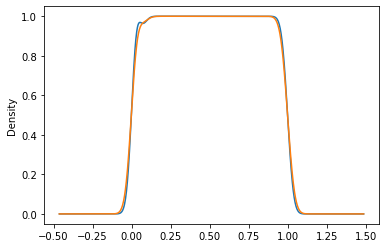

In [0]:
new_train_ds['ranked_feature3'].plot.density()
new_test_ds['ranked_feature3'].plot.density()
plt.show()

there, we will replace spaces by mean, but firstly we will create a **new column** where we will mark places, where feature4 had missed values:

In [0]:
new_train_ds['feature4_is_none']= (new_train_ds[['feature4']] == ' ')
new_test_ds['feature4_is_none'] = (new_test_ds[['feature4']] == ' ')

In [0]:
new_train_ds['feature4']=new_train_ds['feature4'].replace(' ', 0).astype(int)
new_test_ds['feature4']=new_test_ds['feature4'].replace(' ', 0).astype(int)

And also, we will **scale** it to range from 0 to 1:

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(new_train_ds['feature4'].values.reshape(-1, 1))
new_train_ds['feature4'] = scaler.transform(new_train_ds['feature4'].values.reshape(-1, 1))

scaler.fit(new_test_ds['feature4'].values.reshape(-1, 1))
new_test_ds['feature4'] = scaler.transform(new_test_ds['feature4'].values.reshape(-1, 1))

In [0]:
new_train_ds['feature4'] = new_train_ds['feature4'].replace(0, new_train_ds['feature4'].mean())
new_test_ds['feature4'] = new_test_ds['feature4'].replace(0, new_test_ds['feature4'].mean())

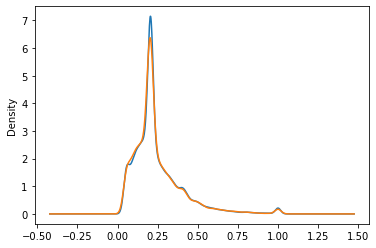

In [0]:
new_train_ds['feature4'].plot.density()
new_test_ds['feature4'].plot.density()
plt.show()

Let's do the same with 9th feature, but without scaling and using median instead of mean as it categorical:

In [0]:
new_train_ds['feature9_is_none']= (new_train_ds[['feature9']] == ' ')
new_test_ds['feature9_is_none'] = (new_test_ds[['feature9']] == ' ')

In [0]:
new_train_ds['feature9']=new_train_ds['feature9'].replace(' ', np.nan)
new_test_ds['feature9']=new_test_ds['feature9'].replace(' ', np.nan)

In [0]:
new_train_ds['feature9']=new_train_ds['feature9'].fillna(new_train_ds['feature9'].median())
new_test_ds['feature9']=new_test_ds['feature9'].fillna(new_train_ds['feature9'].median())

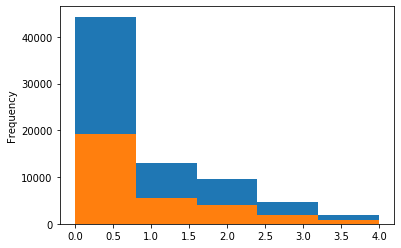

In [0]:
new_train_ds['feature9'].astype(int).plot.hist(bins=5)
new_test_ds['feature9'].astype(int).plot.hist(bins=5)
plt.show()

Now, lets try train on this features:

In [0]:
X = new_train_ds.drop(columns=['target', 'feature3'])
y = new_train_ds['target']

In [0]:
res2 = cross_validate(randf, X, y, scoring=['f1', 'recall'], n_jobs=-1, cv=5, return_train_score=True, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished


In [0]:
print('Test F1: % 0.4f \nTrain F1: % 0.4f \nTest Recall:% 0.4f \nTrain Recall: % 0.4f ' % (np.mean(res2['test_f1']), 
                                                                                          np.mean(res2['train_f1']),
                                                                                          np.mean(res2['test_recall']),
                                                                                          np.mean(res2['train_recall'])))

Test F1:  0.2724 
Train F1:  0.6856 
Test Recall: 0.1782 
Train Recall:  0.5220 


In [0]:
randf.fit(X, y)
print(randf.feature_importances_)

[0.17785335 0.10470248 0.07887272 0.11193162 0.07743679 0.14565338
 0.03128822 0.0832087  0.03809723 0.14000616 0.00691763 0.00403172]


In [0]:
X = new_train_ds.drop(columns=['target', 'feature3', 'feature4'])
y = new_train_ds['target']

In [0]:
res3 = cross_validate(randf, X, y, scoring=['f1', 'recall'], n_jobs=-1, cv=5, return_train_score=True, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished


In [0]:
print('Test F1: % 0.4f \nTrain F1: % 0.4f \nTest Recall:% 0.4f \nTrain Recall: % 0.4f ' % (np.mean(res3['test_f1']), 
                                                                                          np.mean(res3['train_f1']),
                                                                                          np.mean(res3['test_recall']),
                                                                                          np.mean(res3['train_recall'])))

Test F1:  0.2726 
Train F1:  0.6735 
Test Recall: 0.1798 
Train Recall:  0.5082 


So, we can make a conclusion, that new features didn't impact on metrix, but we will try do some same steps with Neural Network (see NNwithFastai Notebook).

transformed dataset will be used in that notebook:

In [0]:
new_train_ds.to_csv('/content/drive/My Drive/credit/new_trainDS.csv')
new_test_ds.to_csv('/content/drive/My Drive/credit/new_testDS.csv')

#Final model

We will use probabilities, that previous models gave as, as meta-parameters for SVM.

Upload results of LGBM and NN:

In [0]:
prediction_nn = pd.read_csv('/content/drive/My Drive/credit/train_predictions.csv')
test_prediction_nn = pd.read_csv('/content/drive/My Drive/credit/test_predictions.csv')

prediction_lgbm = pd.read_csv('/content/drive/My Drive/credit/train_predictions_lgbm.csv')
test_prediction_lgbm = pd.read_csv('/content/drive/My Drive/credit/test_predictions_lgbm.csv')

In [0]:
prediction_nn = prediction_nn[['idx', 'preds', 'target']]
test_prediction_nn = test_prediction_nn[['idx', 'preds']]

In [0]:
prediction_lgbm = prediction_lgbm[['idx', 'preds_1', 'target']]
test_prediction_lgbm = test_prediction_lgbm[['idx', 'preds_1']]

Merging tables:

In [0]:
overall = prediction_lgbm.merge(prediction_nn, left_on='idx', right_on='idx').drop(columns='target_x')

In [0]:
to_predict = test_prediction_lgbm.merge(test_prediction_nn, left_on='idx', right_on='idx')

Let's have a look how our features looks like:

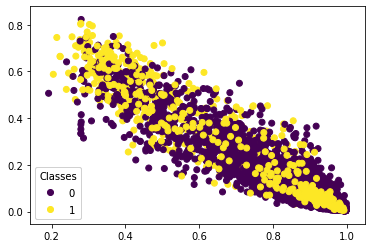

In [0]:
fig, ax = plt.subplots()
scatter = ax.scatter(x=overall.preds, y=overall.preds_1, c=overall.target_y)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)
plt.show()

The reason for the negative correlation is that when I took the probabilities of Neural Net, I took the first column that corresponded to the probability of belonging to 0's class. So we just subtract the probabilities from 1:

In [0]:
overall['preds'] = 1-overall['preds']

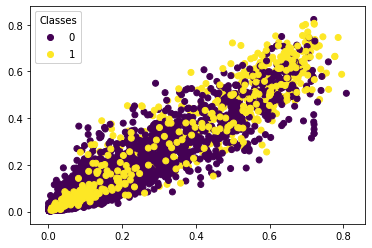

In [0]:
fig, ax = plt.subplots()
scatter = ax.scatter(x=overall.preds, y=overall.preds_1, c=overall.target_y)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes")
ax.add_artist(legend1)
plt.show()

Looks much better.

As it's obvious that data in non linearly separable I would like to choose SVM. And also the reason I choose SVM because is a strong classifier, and one of the advantages of it is that it is not prone to overfit:

In [0]:
from sklearn.svm import SVC

In [0]:
overall.head()

,idx,preds_1,preds,target_y
0,4,0.640971,0.678336,1
1,10,0.063405,0.057729,1
2,21,0.477548,0.647614,1
3,43,0.342983,0.495958,1
4,65,0.290485,0.523644,1


In [0]:
clf = SVC(kernel='rbf', class_weight='balanced')

X = overall.drop(columns=['target_y', 'idx'])
y = overall['target_y']
res3 = cross_validate(clf, X, y, scoring=['f1', 'recall'], n_jobs=-1, cv=5, return_train_score=True, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   24.9s finished


In [0]:
print('Test F1: % 0.4f \nTrain F1: % 0.4f \nTest Recall:% 0.4f \nTrain Recall: % 0.4f ' % (np.mean(res3['test_f1']), 
                                                                                          np.mean(res3['train_f1']),
                                                                                          np.mean(res3['test_recall']),
                                                                                          np.mean(res3['train_recall'])))

Test F1:  0.3487 
Train F1:  0.3500 
Test Recall: 0.7498 
Train Recall:  0.7536 


During cross validation it showed pretty hopeful results, so let's fit the model and make submission:

In [0]:
X_test = to_predict.drop(columns='idx')
clf.fit(X, y)
sub = clf.predict(X_test)

In [0]:
submission = pd.DataFrame(sub,  columns=['target'])


In [0]:
submission.to_csv('/content/drive/My Drive/credit/final_submission.csv')